# Определение выгодного тарифа для телеком компании ☎️

<font size="4"><b>Содержание</b></font>

    

[Описание проекта](#project_summary)  
[Изучение данных из файла и их предобработка](#read_data)  
[Расчет показателей для каждого пользователя](#calculation)  
[Анализ данных. Описание распределений](#analisis)  
[Проверка гипотез](#hipothesis)  
[Общий вывод](#total_conclusion)  

___

<a id='project_summary'></a>
## Описание проекта

**Задача**

Коммерческий департамент попросил нас выяснить, какой тариф приносит больше денег, для принятия решений по корректировке рекламного бюджета. Нам предстоит изучить данные 500 случайных пользователей «Мегалайна» за 2018 год. Для сравнения заданы два тарифных плана. Познакомимся с данными, изучим описательные статистики, построим гистограммы, опишем распределения. Сформулируем и проверим статистические гипотезы о равенстве/различии среднепользовательской выручки:
- по тарифу "Смарт" и "Ультра",
- среди клиентов Москвы и других регионов.

**Описание тарифов**

Тариф| *«Смарт»*| *«Ультра»*
------|:--------:|------:
Ежемесячная плата:| 550 рублей| 1950 рублей
Включено:| 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика| 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
*Стоимость услуг сверх тарифного пакета:*
минута разговора:| 3 рубля| 1 рубль
сообщение:| 3 рубля| 1 рубль
1 Гб интернет-трафика:| 200 рублей| 150 рублей

**Примечание**  
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

**Цель исследования**  
На основании предоставленных данных сделать заключение о наиболее привлекательном для бизнеса тарифном плане. Сравнить поведение (активность) клиентов из Москвы и других регионов.

**Ход исследования**  
Познакомимся с данными, произведём обзор данных, проверим наличие ошибок и оценим их влияние на исследование. На этапе предобработки данных приведем массив к пригодному для исследования виду: объединим таблицы, произведём группировку. Применим графические методы и сводные таблицы для представления полученных результатов. Проверим две гипотезы о средней выручке пользователей "Мегалайна". Таким образом, исследование пройдёт в четыре этапа:

1) Обзор данных и их предобработка;  
2) Расчет показателей для каждого пользователя;  
3) Анализ данных. Описание распределений;  
4) Проверка гипотез.  

<a id='read_data'></a>
## Изучение данных из файлов и их предобработка 

Для начала произведём импорт всех необходимых нам библиотек:

In [1]:
# импорт библиотеки pandas
import pandas as pd

#импорт библиотеки numpy для операций с массивами
import numpy as np

# импорт библиотеки визуализации seaborn
import seaborn as sns

# импорт библиотеки matplotlib для продвинутой работы с графиками
import matplotlib.pyplot as plt

# импорт библиотеки для проведения статистических тестов
from scipy import stats as st

# импорт библиотеки для статистического моделирования
import statsmodels.api as sm

# импорт библиотеки для игнорирования предупреждений
import warnings
warnings.filterwarnings("ignore")

___
Прочитаем данные из первого файла (информация о звонках). Выведем на экран первые 5 строк датасета.

In [2]:
try:
    calls = pd.read_csv('/datasets/calls.csv')
except:
    calls = pd.read_csv('calls.csv')
display(calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Согласно документации к данным, в датафрейме содержится следующая информация:  

**Таблица calls (информация о звонках):**
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

В данных можно заметить звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.  
Посмотрим главные характеристики таблицы, воспользовавшись методом *info()*.

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Мы имеем дело с объёмным массивом информации с большим количеством строк, пропущенных значений в таблице нет. Графу *'call_date'* удобно трансформировать в тип данных *datetime*, но сначала изучим описательную статистику посредством метода *describe()*:

In [4]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Минимальное и максимальное значение в графе *'duration'* не вызывает подозрений, а также средняя продолжительность разговора около семи минут выглядит правдоподобно. Таким образом нет причин полагать, что в рассматриваемых данных имеются выбросы или некорректные значения.  
Перейдем к переводу дат в необходимый нам тип.

In [5]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls.dtypes

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

Проверим, не содержит ли наша таблица явные дубликаты:

In [6]:
calls.duplicated().sum()

0

Дубликатов не оказалось.  
Так как анализировать информацию нам предстоит в разрезе месяцев, добавим в таблицу дополнительный столбец, содержащий информацию о месяце, в который был совершён звонок. В таком виде данные будет удобно группировать.  
Нам известно, что «Мегалайн» всегда округляет секунды до минут. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. Таким образом, добавим в таблицу столбец с длительностью разговоров, округленных в минуты.  
Кроме того, столбец с уникальным номером звонка нам в дальнейшем не понадобится, поэтому просто удалим его.
Выведем на экран 5 случайных строк, чтобы убедиться в том, что новые столбцы заполнились корректно:

In [7]:
calls['month'] = calls['call_date'].values.astype('datetime64[M]')
calls['duration_in_min'] = np.ceil(calls['duration'])
calls = calls[['call_date', 'duration', 'user_id', 'month', 'duration_in_min']]
# добавим в таблицу столбец-счетчик для подсчета количества сделанных звонков
calls['calls_count'] = 1
calls.sample(5)

,call_date,duration,user_id,month,duration_in_min,calls_count
47435,2018-04-12,4.63,1118,2018-04-01,5.0,1
188645,2018-11-24,6.92,1465,2018-11-01,7.0,1
46422,2018-09-22,5.16,1116,2018-09-01,6.0,1
198203,2018-12-17,9.22,1486,2018-12-01,10.0,1
163808,2018-09-09,0.00,1402,2018-09-01,0.0,1


___
Перейдём к следующей таблице с данными. Она содержит информацию об интернет-сессиях. Прочитаем файл и выведем на экран первые 5 строк.

In [8]:
try:
    internet = pd.read_csv('/datasets/internet.csv')
except:
    internet = pd.read_csv('internet.csv')
display(internet.head())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Согласно документации к данным, в датафрейме содержится следующая информация:

**Таблица internet (информация об интернет-сессиях):**
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Познакомимся с основной информацией о таблице:

In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Снова в нашем датафрейме не наблюдается пропущенных значений, проверим его на наличие подозрительных посредством знакомого метода *describe()*:

In [10]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


В графе *'mb_used'* можно заметить большой разрыв между максимальным объёмом потраченного за сессию интернет-трафика и его значением на уровне 75% всех наблюдений. Имеют место выбросы, построим диаграмму рассеяния, чтобы их увидеть:

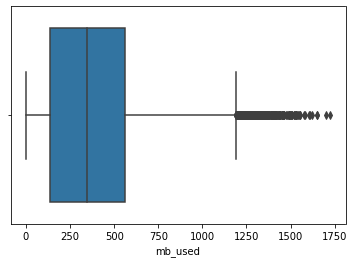

In [11]:
sns.boxplot(x='mb_used', data=internet);

Диаграмма рассеяния подтвердила наши подозрения, и мы видим, что ряд выбивающихся значений оказался за пределами диаграммы. Посчитаем,  сколько таких значений у нас получается:

In [12]:
len(internet[internet['mb_used']>1200])

494

В итоге сильно "мегабайтозатратными" оказалось около 0,33% интернет-сессий. Однако, они сделали свой вклад в объем выручки "Мегалайна", поэтому удалять их в рамках текущего исследования нецелесообразно. Посмотрим, как распределился объем потраченного трафика по всем пользователям. Для этого построим гистограмму.

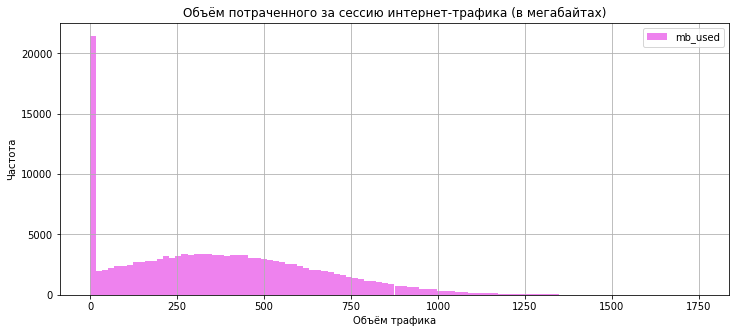

In [13]:
internet.plot(kind='hist', y='mb_used', bins=100, range = (0, 1750),
        label='mb_used',color='violet', grid=True,
        legend=True, title='mb_used', figsize=(12,5))
plt.title('Объём потраченного за сессию интернет-трафика (в мегабайтах)')
plt.xlabel('Объём трафика')
plt.ylabel('Частота');

На гистограмме мы видим резкий пик в районе нуля. Это, судя по всему, несостоявшиеся интернет-сессии или неактивные с точки зрения потребления трафика пользователи. А вот значений больше 1200 Mb очень мало, это очень хорошо видно на гистограмме.

Переведем дату совершенной интернет-сессии в тип *datetime*: 

In [14]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet.dtypes

Unnamed: 0               int64
id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

Проверим, нет ли в таблице явных дубликатов:

In [15]:
internet.duplicated().sum()

0

Так как анализировать информацию нам предстоит в разрезе месяцев, добавим в таблицу дополнительный столбец, содержащий информацию о месяце, в который была совершена интернет-сессия. В таков виде данные будет удобно группировать.  
На этом же шаге избавимся от ненужных столбцов (идентификатор каждой интернет-сессии и *'Unnamed'* - индекс строки):

In [16]:
internet['month'] = internet['session_date'].values.astype('datetime64[M]')
internet = internet[['mb_used', 'session_date', 'user_id', 'month']]
internet.sample(5)

,mb_used,session_date,user_id,month
17991,725.80,2018-09-25,1063,2018-09-01
23432,320.08,2018-11-18,1079,2018-11-01
142319,495.70,2018-05-01,1477,2018-05-01
32662,0.00,2018-09-29,1114,2018-09-01
98363,615.52,2018-04-30,1330,2018-04-01


___
Перейдём к таблице, содержащей информацию об отправленных сообщениях. Прочитаем файл и выведем на экран первые пять строк:

In [17]:
try:
    messages = pd.read_csv('/datasets/messages.csv')
except:
    messages = pd.read_csv('messages.csv')
display(messages.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Согласно документации к данным, в датафрейме содержатся следующие данные:  

**Таблица messages (информация о сообщениях):**
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Познакомимся с основной информацией о таблице:

In [18]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица не содержит пропущенных значений. Переведём дату отправки сообщения в удобный тип данных:

In [19]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages.dtypes

id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

Проверим таблицу на наличие явных дубликатов:

In [20]:
messages.duplicated().sum()

0

Так как анализировать информацию нам предстоит в разрезе месяцев, добавим в таблицу дополнительный столбец, содержащий информацию о месяце, в который было отправлено сообщение. В таком виде данные будет удобно группировать.  
Кроме того, для удобства подсчета количества отправленных сообщений добавим в таблицу столбец-счетчик, где на каждое наблюдение проставим "1". Выведем на экран 5 случайных строк, чтобы убедиться в том, что таблица обновилась:

In [21]:
messages['month'] = messages['message_date'].values.astype('datetime64[M]')
messages['message_count'] = 1
messages = messages[['message_date', 'user_id', 'month', 'message_count']]
messages.sample(5)

,message_date,user_id,month,message_count
62019,2018-09-28,1272,2018-09-01,1
95203,2018-05-18,1392,2018-05-01,1
104242,2018-09-09,1424,2018-09-01,1
2571,2018-05-10,1005,2018-05-01,1
68881,2018-09-02,1294,2018-09-01,1


___
Изучим таблицу с информацией о тарифах:

In [22]:
try:
    tariffs = pd.read_csv('/datasets/tariffs.csv')
except:
    tariffs = pd.read_csv('tariffs.csv')
display(tariffs.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Перед нами лаконичная таблица всего из двух строк, отображает информацию о двух сравниваемых тарифах.  
Согласно документации к данным, в датафрейме хранятся следующие данные:

**Таблица tariffs (информация о тарифах):**
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Просмотрим общую информацию о таблице:

In [23]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Переведем мегабайты в гигабайты и соответственно присвоим новое имя графе. Также переименуем столбец *'tariff_name'* в более лаконичный и удобный *'tariff'* (это нам поможет при дальнейшем объединении, потому как аналогичный столбец есть в таблице с информацией о пользователях.

In [24]:
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included']/1024
tariffs = tariffs.rename(columns = {'tariff_name':'tariff', 'mb_per_month_included':'gb_per_month_included'})
display(tariffs)

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


___
Последняя таблица хранит в себе информацию о пользователях. Посмотрим на первые пять строк:

In [25]:
try:
    users = pd.read_csv('/datasets/users.csv')
except:
    users = pd.read_csv('users.csv')
display(users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Согласно документации к данным, датафрейм содержит следующую информацию:

**Таблица users (информация о пользователях):**
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Посмотрим общую информацию о таблице:

In [26]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Нам предоставлена информация о 500 пользователях. Пропущенные значения имеются только по датам прекращения пользования тарифом, что вполне объяснимо: тариф ещё действовал на момент выгрузки данных. Заполнять такие пропуски нецелесообразно.  
Поработаем с датами, транформируем их в тип *datetime*:

In [27]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
users.dtypes

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

Информация об имени, фамилии и возрасте пользователей в текущем исследовании не понадобится (достаточно уникального идентификатора *user_id*), поэтому избавимся от этих граф на этапе предобработки данных:

In [28]:
users = users[['user_id', 'churn_date', 'city', 'reg_date', 'tariff']]
users.sample(5)

,user_id,churn_date,city,reg_date,tariff
197,1197,NaT,Красноярск,2018-06-18,smart
437,1437,NaT,Казань,2018-08-03,smart
20,1020,2018-12-18,Чита,2018-10-22,smart
89,1089,NaT,Иркутск,2018-02-24,ultra
39,1039,NaT,Ярославль,2018-06-21,ultra


В рамках текущего исследования необходимо будет сравнить среднюю выручку по пользователям из Москвы и других городов. Посмотрим, какие города оказались представлены в нашей выборке:

In [29]:
users['city'].value_counts()

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Архангельск         1
Иваново             1
Нижневартовск       1
Химки               1
Подольск            1
Name: city, Length: 76, dtype: int64

Представленными оказаись 76 наименований, такая подробная катеоризация нам не нужна. Сузим её до трёх групп: Москва, Санкт-Петербург (как второй по объему представления в текущей выборке) и другие города. Перезапишем в столбец *'city'* новые категории:

In [30]:
# напишем функцию для перезаписи названий городов
def city_rename(city):
    if city == 'Москва':
        return 'Москва'
    if city == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    return 'Другой город'

users['city'] = users['city'].apply(city_rename)
users['city'].value_counts()

Другой город       362
Москва              99
Санкт-Петербург     39
Name: city, dtype: int64

Таким образом, мы подготовили все наши таблицы к следующему шагу: группировкам и объединению.
___
Прежде, чем формировать датафрейм для исследования, убедимся, что в наших данных нет противоречий, а именно сравним даты звонков/сообщений/интернет-сессий с датами регистрации и прекращения пользования тарифом. Таким образом, выясним, все ли записи "вписываются" в срок действия тарифного плана.  
Для этого к каждой из таблиц *'calls'*, *'internet'* и *'messages'* подсоединим данные из *'users'*:

In [31]:
calls_users = calls.merge(users, how='left', on='user_id')
calls_users.head()

,call_date,duration,user_id,month,duration_in_min,calls_count,churn_date,city,reg_date,tariff
0,2018-07-25,0.00,1000,2018-07-01,0.0,1,NaT,Другой город,2018-05-25,ultra
1,2018-08-17,0.00,1000,2018-08-01,0.0,1,NaT,Другой город,2018-05-25,ultra
2,2018-06-11,2.85,1000,2018-06-01,3.0,1,NaT,Другой город,2018-05-25,ultra
3,2018-09-21,13.80,1000,2018-09-01,14.0,1,NaT,Другой город,2018-05-25,ultra
4,2018-12-15,5.18,1000,2018-12-01,6.0,1,NaT,Другой город,2018-05-25,ultra


Обратимся к ячейкам по условию выпадения из временного интервала действия тарифа. Если таких строк не окажется, то можно сделать вывод о том, что противоречий в данных по части звонков нет:

In [32]:
calls_users.loc[(calls_users['call_date'] < calls_users['reg_date']) | (
    calls_users['call_date'] > calls_users['churn_date'])]

,call_date,duration,user_id,month,duration_in_min,calls_count,churn_date,city,reg_date,tariff


Убедились в том, что с информацией о звонках всё в порядке. Проделаем всё то же самое для следующей таблицы:

In [33]:
internet_users = internet.merge(users, how='left', on='user_id')
internet_users.head()

,mb_used,session_date,user_id,month,churn_date,city,reg_date,tariff
0,112.95,2018-11-25,1000,2018-11-01,NaT,Другой город,2018-05-25,ultra
1,1052.81,2018-09-07,1000,2018-09-01,NaT,Другой город,2018-05-25,ultra
2,1197.26,2018-06-25,1000,2018-06-01,NaT,Другой город,2018-05-25,ultra
3,550.27,2018-08-22,1000,2018-08-01,NaT,Другой город,2018-05-25,ultra
4,302.56,2018-09-24,1000,2018-09-01,NaT,Другой город,2018-05-25,ultra


Проверим условие для информации об интернет-сессиях:

In [34]:
internet_users.loc[(internet_users['session_date'] < internet_users['reg_date']) | (
    internet_users['session_date'] > internet_users['churn_date'])]

,mb_used,session_date,user_id,month,churn_date,city,reg_date,tariff


Всё в порядке и здесь. Перейдем к информации о сообщениях:

In [35]:
messages_users = messages.merge(users, how='left', on='user_id')
messages_users.head()

,message_date,user_id,month,message_count,churn_date,city,reg_date,tariff
0,2018-06-27,1000,2018-06-01,1,NaT,Другой город,2018-05-25,ultra
1,2018-10-08,1000,2018-10-01,1,NaT,Другой город,2018-05-25,ultra
2,2018-08-04,1000,2018-08-01,1,NaT,Другой город,2018-05-25,ultra
3,2018-06-16,1000,2018-06-01,1,NaT,Другой город,2018-05-25,ultra
4,2018-12-05,1000,2018-12-01,1,NaT,Другой город,2018-05-25,ultra


Проверим условие также и для последней таблицы:

In [36]:
messages_users.loc[(messages_users['message_date'] < messages_users['reg_date']) | (
    messages_users['message_date'] > messages_users['churn_date'])]

,message_date,user_id,month,message_count,churn_date,city,reg_date,tariff


Мы убедились в том, что противоречий среди дат в наших таблицах нет. Информация о  дате регистрации и дате прекращения действия тарифа нам больше не понадобится, поэтому удалим её из таблицы *'users'*:

In [37]:
users = users[['user_id', 'city', 'tariff']]
users.head()

,user_id,city,tariff
0,1000,Другой город,ultra
1,1001,Москва,smart
2,1002,Другой город,smart
3,1003,Москва,ultra
4,1004,Другой город,ultra


Теперь можно приступить к формированию датасета для проведения анализа. Чтобы не получить для исследования таблицу с очень большим количеством срок, перед объединением сгруппируем данные по месяцам и пользователям:

In [38]:
calls = calls.groupby(['month', 'user_id'])['duration_in_min', 'calls_count'].sum().reset_index()
display(calls.head())
calls.shape[0]

,month,user_id,duration_in_min,calls_count
0,2018-01-01,1005,95.0,15
1,2018-01-01,1032,380.0,61
2,2018-01-01,1045,9.0,1
3,2018-01-01,1055,551.0,64
4,2018-01-01,1071,194.0,24


3174

Количество строк заметно сократилось. В обновленной таблице мы получили информацию минутах разговора каждого пользователя в разрезе месяцев. Итоговое количество минут получено исходя из условия округления каждого звонка до целых минут. Аналогичным образом сгруппируем данные об интернет-сессиях. По условиям "Мегалайна" для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.  
Посчитаем сразу количество потраченных каждым пользователем гигабайт в разрезе месяцев:

In [39]:
internet = internet.groupby(['month', 'user_id'])['mb_used'].sum().reset_index()
internet['gb_used'] = np.ceil(internet['mb_used'] /1024)
internet = internet[['month', 'user_id', 'gb_used']]
display(internet.head())
internet.shape[0]

,month,user_id,gb_used
0,2018-01-01,1005,3.0
1,2018-01-01,1032,24.0
2,2018-01-01,1045,3.0
3,2018-01-01,1055,17.0
4,2018-01-01,1071,16.0


3203

Снова количесво строк существенно сократилось, будет удобно объединять. Сгруппируем также информацию об отправленных сообщениях:

In [40]:
messages = messages.groupby(['month', 'user_id'])['message_count'].sum().reset_index()
display(messages.head())
messages.shape[0]

,month,user_id,message_count
0,2018-01-01,1005,7
1,2018-01-01,1032,38
2,2018-01-01,1045,5
3,2018-01-01,1055,30
4,2018-01-01,1071,16


2717

Теперь объединим все три таблицы в один датафрейм, который будет отражать, сколько пользователи потратили минут, сообщений и гигабайт за каждый месяц:

In [41]:
df = calls.merge(internet, how='left', on=['month', 'user_id'])
df = df.merge(messages, how='left', on=['month', 'user_id'])
display(df.sample(5))
df.info()

,month,user_id,duration_in_min,calls_count,gb_used,message_count
3163,2018-12-01,1487,155.0,30,12.0,20.0
2762,2018-12-01,1063,231.0,36,6.0,NaN
322,2018-04-01,1255,237.0,39,37.0,NaN
28,2018-01-01,1375,852.0,126,15.0,75.0
2111,2018-10-01,1322,583.0,88,14.0,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 0 to 3173
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   month            3174 non-null   datetime64[ns]
 1   user_id          3174 non-null   int64         
 2   duration_in_min  3174 non-null   float64       
 3   calls_count      3174 non-null   int64         
 4   gb_used          3163 non-null   float64       
 5   message_count    2678 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 173.6 KB


В результате мы получили таблицу из 3174 строк. Пропуски в графах *'gb_used'* и *'message_count'* говорят о том, что были месяцы, в которых некоторые пользователи не пользовались интернетом и не отправляли сообщения. Можно заполнить их нулями:

In [42]:
df['gb_used'] = df['gb_used'].fillna(0)
df['message_count'] = df['message_count'].fillna(0)
df.isna().sum()

month              0
user_id            0
duration_in_min    0
calls_count        0
gb_used            0
message_count      0
dtype: int64

Для дальнейшего расчета выручки по каждому пользователю, нам необходимо дополнить наш датафрейм информацией из таблиц *'users'* и *'tariffs'*:

In [43]:
df = df.merge(users, how='left', on='user_id')
df = df.merge(tariffs, how='left', on='tariff')
df.sample(5)

,month,user_id,duration_in_min,calls_count,gb_used,message_count,city,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
1579,2018-09-01,1146,424.0,60,13.0,90.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3
1559,2018-09-01,1115,652.0,77,14.0,26.0,Москва,smart,50,15.0,500,550,200,3,3
495,2018-05-01,1219,467.0,57,17.0,13.0,Другой город,smart,50,15.0,500,550,200,3,3
2929,2018-12-01,1238,112.0,11,18.0,31.0,Другой город,smart,50,15.0,500,550,200,3,3
479,2018-05-01,1175,131.0,33,21.0,0.0,Москва,smart,50,15.0,500,550,200,3,3


**Вывод**  
Мы прочитали данные из файлов, привели данные к нужным типам, устранили ошибки. Собрали всю необходимую для расчета выручки информацию в один датафрейм. Сгруппировали данные в разрезе пользователей и месяцев. Для каждого пользователя посчитали количество потраченных минут, отправленных sms и объём потреблённого трафика, перевели данные в единицы измерения, удобные для тарификации.

<a id='calculation'></a>
## Расчет показателей для каждого пользователя
Мы получили таблицу, на базе которой мы сможем рассчитать выручку по каждому пользователю в разрезе месяцев.  
Необходимо посчитать помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).  

Напомним себе описание тарифов:  
**Тариф «Смарт»**
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей  
**Тариф «Ультра»**
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей  
Произведём расчет с помощью функций:

In [44]:
def revenue_min(row):
    """
Напишем функцию, которая:
1) посчитает перерасход минут, умножит на цену за дополнительную минуту из тарифного плана
2) добавит к результату абонентскую плату
3) вернёт полученное значение
4) в случае отсутствия перерасхода вернёт значение абонентской платы
    """
    if row['duration_in_min'] > row['minutes_included']:
        rev = (row['duration_in_min'] - row['minutes_included'])*row['rub_per_minute'] + row['rub_monthly_fee']
        return rev
    else:
        rev = row['rub_monthly_fee']
        return rev

# напишем функцию, которая посчитает перерасход gb, умножит на цену за дополнительный gb из тарифного плана
def revenue_gb(row):
    if row['gb_used'] > row['gb_per_month_included']:
        rev = (row['gb_used'] - row['gb_per_month_included'])*row['rub_per_gb']
        return rev
    else:
        rev = 0
        return rev

# напишем функцию, которая посчитает перерасход sms, умножит на цену за дополнительное sms из тарифного плана
def revenue_sms(row):
    if row['message_count'] > row['messages_included']:
        rev = (row['message_count'] - row['messages_included'])*row['rub_per_minute']
        return rev
    else:
        rev = 0
        return rev

df['revenue'] = df.apply(revenue_min, axis=1)
df['revenue'] += df.apply(revenue_gb, axis=1)
df['revenue'] += df.apply(revenue_sms, axis=1)
# оставим только нужные для дальнейшего исследования столбцы и выведем 5 случайных строк на экран
df = df[['month', 'user_id', 'duration_in_min', 'gb_used', 'message_count', 'city', 'tariff', 'revenue']]
df.sample(5)

,month,user_id,duration_in_min,gb_used,message_count,city,tariff,revenue
887,2018-07-01,1057,781.0,17.0,29.0,Москва,ultra,1950.0
395,2018-04-01,1475,230.0,13.0,21.0,Другой город,smart,550.0
259,2018-04-01,1063,581.0,17.0,0.0,Другой город,ultra,1950.0
183,2018-03-01,1285,234.0,2.0,110.0,Другой город,smart,730.0
532,2018-05-01,1318,598.0,27.0,49.0,Другой город,ultra,1950.0


Сгруппируем данные по каждому тарифу и рассчитаем средние показатели для сравнения:

In [45]:
df.groupby('tariff')['duration_in_min', 'gb_used', 'message_count', 'revenue'].mean()

,duration_in_min,gb_used,message_count,revenue
tariff,,,,
smart,419.062978,16.329735,33.396311,1290.891138
ultra,545.451104,19.487907,49.033649,2070.977918


Беглый взгляд по средним величинам говорит нам о том, что тариф "ультра" выбирают более активные пользователи, и выручки "Мегалайну" каждый такой средний пользователь приносит больше, чем пользователь "смарт".

Так как в дальнейшем нам нужно сравнивать между собой тарифы, разобъём нашу таблицу на две отдельные для каждого тарифного плана:

In [46]:
smart = df.loc[df['tariff'] == 'smart'].reset_index()
display(smart.head())
ultra = df.loc[df['tariff'] == 'ultra'].reset_index()
ultra.head()

,index,month,user_id,duration_in_min,gb_used,message_count,city,tariff,revenue
0,0,2018-01-01,1005,95.0,3.0,7.0,Другой город,smart,550.0
1,1,2018-01-01,1032,380.0,24.0,38.0,Другой город,smart,2350.0
2,2,2018-01-01,1045,9.0,3.0,5.0,Другой город,smart,550.0
3,3,2018-01-01,1055,551.0,17.0,30.0,Другой город,smart,1103.0
4,4,2018-01-01,1071,194.0,16.0,16.0,Другой город,smart,750.0


,index,month,user_id,duration_in_min,gb_used,message_count,city,tariff,revenue
0,6,2018-01-01,1120,55.0,1.0,0.0,Другой город,ultra,1950.0
1,7,2018-01-01,1126,272.0,16.0,4.0,Санкт-Петербург,ultra,1950.0
2,11,2018-01-01,1168,277.0,8.0,14.0,Другой город,ultra,1950.0
3,19,2018-01-01,1254,466.0,20.0,0.0,Москва,ultra,1950.0
4,28,2018-01-01,1375,852.0,15.0,75.0,Другой город,ultra,1950.0


**Вывод**

На базе построенной нами таблицы, приняв во внимание известные нам условия тарифов "Мегалайна", мы произвели расчет среднепользовательской выручки. На следующих этапах нашего исследования нам предстоит проанализировать поведение польователей обоих тарифов на протяжении 2018 года и сделать вывод: какой тариф лучше.

<a id='analisis'></a>
## Анализ данных. Описание распределений
Проанализируем наши данные: сравним поведение клиентов оператора, исходя из выборки (сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц).
Отразим средние значения на графиках для большей наглядности, проследим их динамику в пределах года.

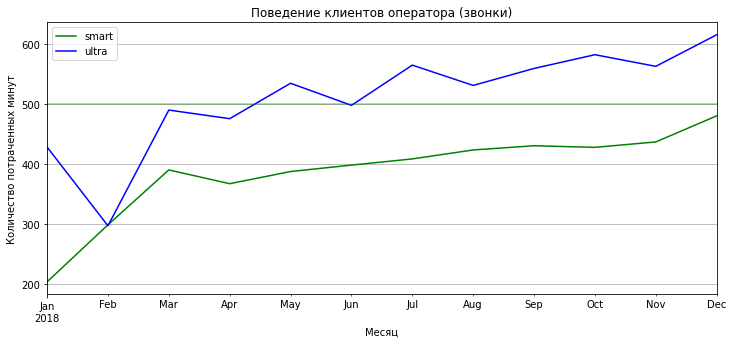

In [47]:
ax = smart.pivot_table(
index = 'month',
values = 'duration_in_min',
aggfunc = 'mean').plot(y='duration_in_min', color='green', label='smart')

ultra.pivot_table(
index = 'month',
values = 'duration_in_min',
aggfunc = 'mean').plot(
    y='duration_in_min', grid=True, figsize=(12,5), color='blue', ax=ax, label='ultra', legend=True)

# нарисуем линию лимита для тарифа "смарт"
plt.hlines(500, xmin='2018-01-01', xmax='2018-12-01', color='green', alpha=0.4)
plt.title('Поведение клиентов оператора (звонки)')
plt.xlabel('Месяц')
plt.ylabel('Количество потраченных минут');

На графике видно, что пользователи тарифа "ультра" преимущественно более активны, чем пользователи тарифа "смарт" (за исключением февраля, где показатели практически равны). Заметна тенденция к наращиванию минут звонков в течение года.  
На обоих тарифах пользователи в среднем тратят количество минут в пределах установленного тарифом лимита. Однако, пользователи тарифа "смарт" в декабре очень приблизились к отведённым 500 минутам. В то же время пользователи "ультра" не тратят даже пятой части от установленных 3000 минут.

Сравним, сколько пользователи обоих тарифов тратят интернет-траффика:

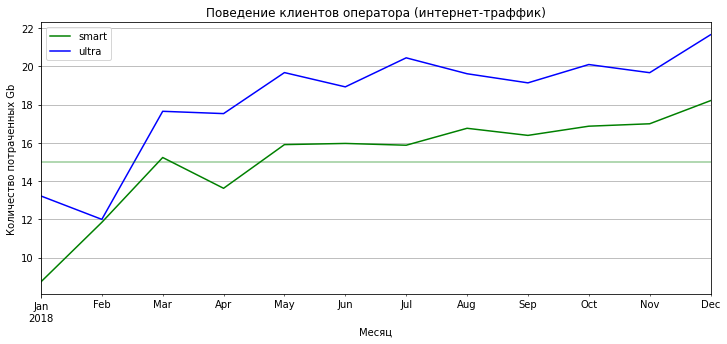

In [48]:
ax = smart.pivot_table(
index = 'month',
values = 'gb_used',
aggfunc = 'mean').plot(y='gb_used', color='green', label='smart')

ultra.pivot_table(
index = 'month',
values = 'gb_used',
aggfunc = 'mean').plot(
    y='gb_used', grid=True, figsize=(12,5), color='blue', ax=ax, label='ultra', legend=True)

# нарисуем линию лимита для тарифа "смарт"
plt.hlines(15, xmin='2018-01-01', xmax='2018-12-01', color='green', alpha=0.4)
plt.title('Поведение клиентов оператора (интернет-траффик)')
plt.xlabel('Месяц')
plt.ylabel('Количество потраченных Gb');

Графики о потраченном интернет-траффике пользователями обоих тарифов демонстрируют тенденции, аналогичные минутам разговора. В феврале показатели практически совпадают, а в течение года преимущественно растут. Пользователи тарифа "ультра" по большей части тратят больше интернет-траффика, чем пользователи тарифа "смарт". Однако, если обратиться к лимитам по тарифам, то становится видно, что примерно с мая пользователи "смарт" перестали укладываться в отведённые им 15 Gb. В то же время пользователи "ультра" в среднем не приблизились к установленным 30 Gb даже в декабре.

Изучим активность пользователей обоих тарифов в части отправленных сообщений:

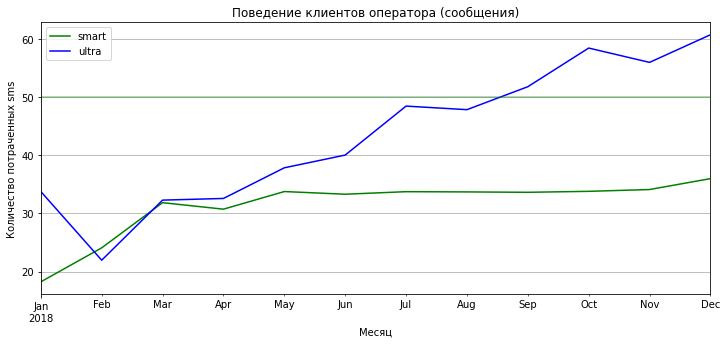

In [49]:
ax = smart.pivot_table(
index = 'month',
values = 'message_count',
aggfunc = 'mean').plot(y='message_count', color='green', label='smart')

ultra.pivot_table(
index = 'month',
values = 'message_count',
aggfunc = 'mean').plot(
    y='message_count', grid=True, figsize=(12,5), color='blue', ax=ax, label='ultra', legend=True)

# нарисуем линию лимита для тарифа "смарт"
plt.hlines(50, xmin='2018-01-01', xmax='2018-12-01', color='green', alpha=0.4)
plt.title('Поведение клиентов оператора (сообщения)')
plt.xlabel('Месяц')
plt.ylabel('Количество потраченных sms');

Характер линий графиков, отражающих количество отправленных смс пользователями обоих тарифов в течение года, немного отличается от двух предыдущих. Здесь показатели почти сравнялись в марте, а вот в феврале пользователи тарифа "смарт" активнее писали сообщения, чем пользователи тарифа "ультра". С апреля по пользователям "ультра" заметен явный рост, а вот показатель тарифа "смарт" оставался практически на одном уровне.  
С приходом мессенджеров в наши жизни SMS-сообщения потеряли свою актуальность. Линии графиков демонстрируют нам, что в установленный лимит отправленных сообщений пользователи обоих тарифов с лёгкостью укладываются.

Средние величины демонтрируют нам общую тенденцию внутри каждой выборки. Посмотрим, насколько однородны данные по пользователям тарифов "смарт" и "ультра", рассчитав дисперсию и стандартное отклонение по каждому датафрейму:

In [50]:
smart_variance = np.var(smart[['duration_in_min', 'gb_used', 'message_count', 'revenue']])
print('Дисперсия показателей по тарифу "смарт":')
print(smart_variance)

Дисперсия показателей по тарифу "смарт":
duration_in_min     35828.065310
gb_used                33.077510
message_count         798.236550
revenue            670655.507717
dtype: float64


In [51]:
ultra_variance = np.var(ultra[['duration_in_min', 'gb_used', 'message_count', 'revenue']])
print('Дисперсия показателей по тарифу "ультра":')
print(ultra_variance)

Дисперсия показателей по тарифу "ультра":
duration_in_min     94104.361174
gb_used                97.717782
message_count        2196.421581
revenue            143810.715601
dtype: float64


Дисперсия характеризует разброс случайной величины вокруг её математического ожидания (среднего арифметического). Рассчитанные дисперсии демонстрируют нам, что разброс данных по тарифу "ультра больше.

Для того, чтобы понять как сильно отклоняются данные от средней величины, рассчитаем стандартное отклонение показателей по двум тарифам:

In [52]:
smart_std = np.std(smart[['duration_in_min', 'gb_used', 'message_count', 'revenue']], ddof=1)
print('Стандартное отклонение показателей по тарифу "смарт":')
print(smart_std)

Стандартное отклонение показателей по тарифу "смарт":
duration_in_min    189.325618
gb_used              5.752599
message_count       28.259437
revenue            819.119853
dtype: float64


In [53]:
ultra_std = np.std(ultra[['duration_in_min', 'gb_used', 'message_count', 'revenue']], ddof=1)
print('Стандартное отклонение показателей по тарифу "ультра":')
print(ultra_std)

Стандартное отклонение показателей по тарифу "ультра":
duration_in_min    306.925754
gb_used              9.890432
message_count       46.890656
revenue            379.423372
dtype: float64


Мы видим, что отклонение от средней величины по показателям тарифа "ультра" также больше. Так, варианты звонков среди пользователей "ультра" откланяются от средней на почти 307 минут, а среди пользователей "смарт" - на 189 минут. Расход трафика пользователей "ультра" в среднем откланяется от среднего арифметического значения на 9.9 Gb, а пользователей "смарт" - на 5.8 Gb. Количество отправленных сообщений пользователями "смарт" в среднем отлично от средней арифметической на 28, а "ультра" - на 47 сообщений. Средний доход по пользователям "ультра" также варьирует сильнее, чем по пользователям "смарт".

Прежде чем выдвигать гипотезы на проверку относительно выручки по обоим тарифам, необходимо посмотреть, как распределены данные. Для этой цели построим гистограммы для каждого показателя, подберём подходящее количество "корзин" для большей наглядности:

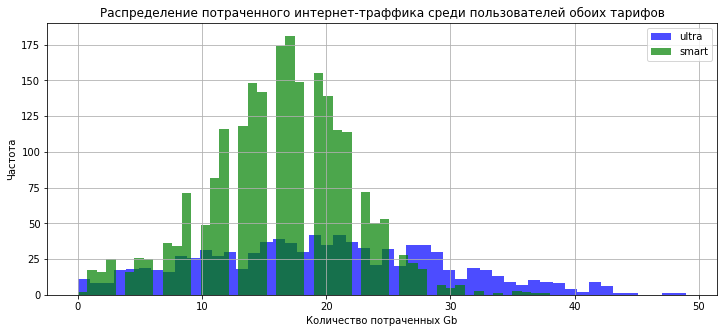

In [54]:
ax = ultra['gb_used'].plot(bins=50, alpha=0.7, kind='hist', label='ultra', legend=True, color='blue')
smart['gb_used'].plot(
    bins=50, alpha=0.7, ax=ax, kind='hist', label='smart', grid=True, figsize=(12,5), legend=True, color='green');
plt.title('Распределение потраченного интернет-траффика среди пользователей обоих тарифов')
plt.xlabel('Количество потраченных Gb')
plt.ylabel('Частота');

Очертания гистограммы по потраченному трафику среди пользователей тарифа "смарт" демонтрируют распределение, похожее на нормальное. А гистограмма по тарифу "ультра" не наглядна, поэтому построим для этих данных график квантилей-квантилей:

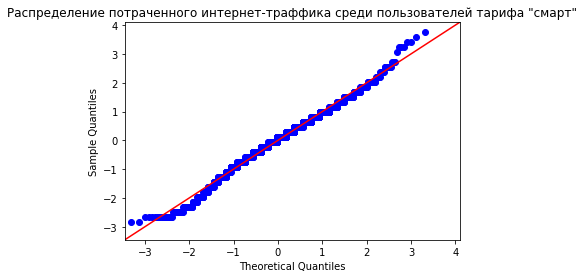

In [55]:
sm.qqplot(smart['gb_used'], fit=True, line="45", color='blue')
plt.title('Распределение потраченного интернет-траффика среди пользователей тарифа "смарт"')
plt.show()

График квантилей-квантилей по потраченному трафику среди пользователей тарифа "ультра" тоже демонтрирует распределение, похожее на нормальное.

Посмотрим, как выглядит распределение потраченных сообщений среди пользователей обоих тарифов:

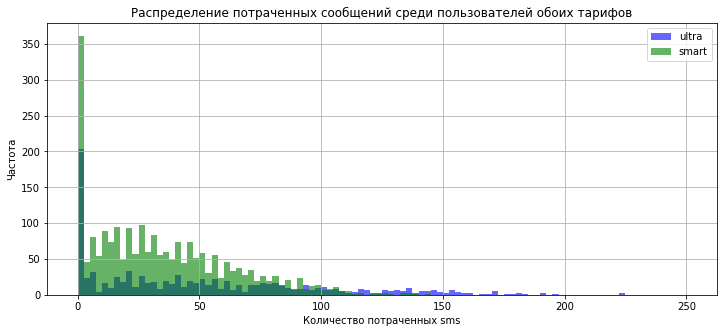

In [56]:
ax = ultra['message_count'].plot(bins=100, alpha=0.6, kind='hist', label='ultra', legend=True, color='blue', range=(
    0,250))
smart['message_count'].plot(
    bins=100, alpha=0.6, ax=ax, kind='hist', label='smart', grid=True, figsize=(
        12,5), legend=True, color='green', range=(0,250));
plt.title('Распределение потраченных сообщений среди пользователей обоих тарифов')
plt.xlabel('Количество потраченных sms')
plt.ylabel('Частота');

Здесь тоже лучше прибегнуть к графику квантилей-квантилей:

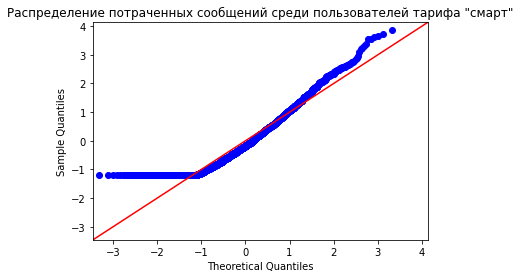

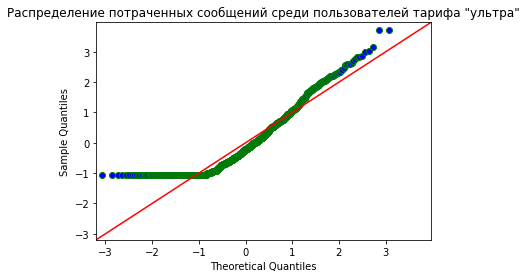

In [57]:
sm.qqplot(smart['message_count'], fit=True, line="45", color='blue')
plt.title('Распределение потраченных сообщений среди пользователей тарифа "смарт"')
plt.show()
sm.qqplot(ultra['message_count'], fit=True, line="45", color='green')
plt.title('Распределение потраченных сообщений среди пользователей тарифа "ультра"')
plt.show()

График квантилей-квантилей подтверждает нам, что нормальным это распределение назвать нельзя. Количество потраченных сообщений - дискретная величина, поэтому распределение скорее биномиальное. Однако, при большом количестве повторений простого биномиального эксперимента биномиальное распределение приближается к нормальному.

Построим гистограмму распределения потраченных минут разговоров среди пользователей обоих тарифов:

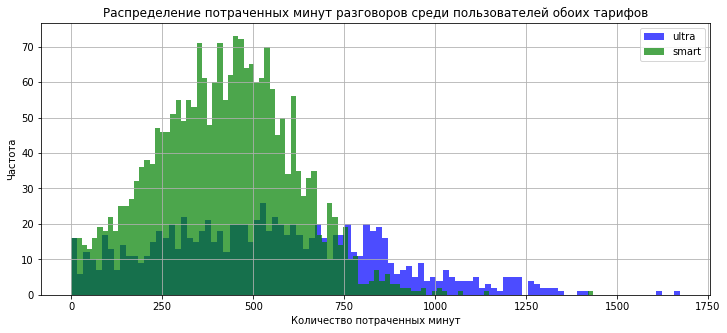

In [58]:
ax = ultra['duration_in_min'].plot(bins=100, alpha=0.7, kind='hist', label='ultra', legend=True, color='blue')
smart['duration_in_min'].plot(
    bins=100, alpha=0.7, ax=ax, kind='hist', label='smart', grid=True, figsize=(12,5), legend=True, color='green');
plt.title('Распределение потраченных минут разговоров среди пользователей обоих тарифов')
plt.xlabel('Количество потраченных минут')
plt.ylabel('Частота');

Данные о потраченных минутах разговорах среди пользователей тарифа "смарт" имеют распределение, похожее нанормальное. А данные по тарифу "ультра" снова имеет смысл дополнительно изобразить на графике квантилей-квантилей:

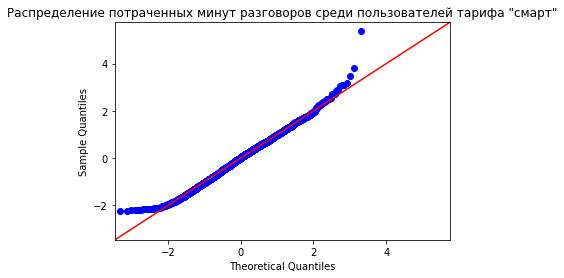

In [59]:
sm.qqplot(smart['duration_in_min'], fit=True, line="45", color='blue')
plt.title('Распределение потраченных минут разговоров среди пользователей тарифа "смарт"')
plt.show()

Распределение потраченных минут разговоров среди пользователей тарифа "смарт" тоже похоже на нормальное. 

**Вывод**
Стоит сказать, генеральная совокупнось может быть распределена как угодно: датасет из средних значений выборок всё равно будет нормально распределён вокруг среднего всей совокупности. В нашем распоряжении было достаточное количество данных. Сгруппировав данные в разрезе пользователей и месяцев, посчитав средние по каждой группе, изобразив распределения графически, мы убедились в том, что можем переходить к следующему шагу нашего исследования: формулированию гипотез и проведению статистического теста.

<a id='hipothesis'></a>
## Проверка гипотез
В заключительной части нашего исследования нам предстоит проверить гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются; средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Для начала, посмотрим динамику средней выручки пользователей по каждому тарифу и сравним с общей средней:

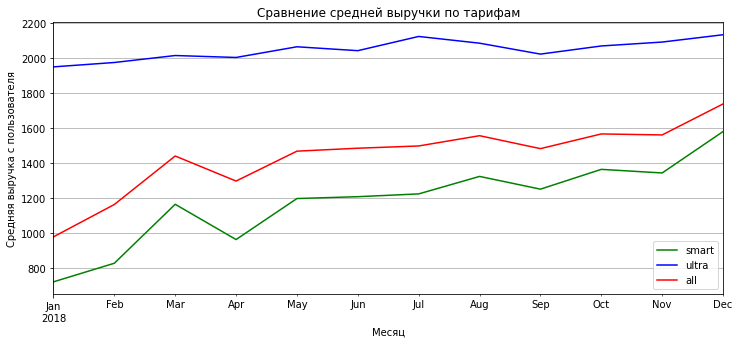

In [60]:
ax = smart.pivot_table(
index = 'month',
values = 'revenue',
aggfunc = 'mean').plot(y='revenue', color='green', label='smart')

ultra.pivot_table(
index = 'month',
values = 'revenue',
aggfunc = 'mean').plot(
    y='revenue', grid=True, figsize=(12,5), color='blue', ax=ax, label='ultra', legend=True)

# добавим на график динамику средней выручки пользователей обоих тарифов
df.pivot_table(
index = 'month',
values = 'revenue',
aggfunc = 'mean').plot(
    y='revenue', grid=True, figsize=(12,5), color='red', ax=ax, label='all', legend=True)

plt.title('Сравнение средней выручки по тарифам')
plt.xlabel('Месяц')
plt.ylabel('Средняя выручка с пользователя');

По графику можно сделать вывод, что средняя выручка пользователей тарифа "ультра" значительно выше, чем выручка пользователей тарифа "смарт" (и выше, чем средняя выручка всех пользователей). Вместе с тем, заметим, что уровень средней выручки среди пользователей тарифа "ультра" колеблется незначительно, что нельзя сказать о графике средней выручки среди пользователей "смарт" - там заметна явная тенденция роста к концу 2018 года.

Таким образом, сформулируем следующие гипотезы для проверки:  
**H_0**: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны,  
**H_1**: средняя выручка пользователей тарифа «Ультра» больше, чем средняя выручка пользователей тарифа «Смарт» (альтернативную гипотезу выдвенем односторонней, так как первичный вывод нам позволили сделать графики).

Так как мы имеем дело с двумя независимыми выборками, то для проверки гипотез будем использовать метод *ttest_ind()*:

In [61]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(ultra['revenue'], smart['revenue'])

# тест односторонний: p-value необходимо разделить на 2
print('p-значение:', results.pvalue/2)

# тест односторонний вправо:
# отвергаем нулевую гипотезу только если среднее выборки "ультра" значимо больше среднего выборки "смарт"
if (results.pvalue/2 < alpha) and (ultra['revenue'].mean() > smart['revenue'].mean()):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0915154124556464e-155
Отвергаем нулевую гипотезу


Полученные расчеты позволяют отвергнуть нулевую гипотезу о равенстве средней вручки пользователей тарифов "смарт" и "ультра" в пользу альтернативной гипотезы: средняя выручка пользователей тарифа «Ультра» больше, чем средняя выручка пользователей тарифа «Смарт». На следующем шаге нашего исследования нам предстоит сравнить среднюю выручку пользователей "Мегалайн" в Москве и других регионах. 

Таким образом, сформулируем следующие гипотезы для проверки:  
**H_0**: средняя выручка пользователей "Мегалайн" из Москвы и из других регионов равны,  
**H_1**: средняя выручка пользователей "Мегалайн" из Москвы отличается от выручки пользователей из других регионов (двусторонняя альтернативная гипотеза).

Так как мы имеем дело с двумя независимыми выборками, то для проверки гипотез будем использовать метод ttest_ind():

In [62]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(df[df['city'] == 'Москва']['revenue'], df[df['city'] != 'Москва']['revenue'])

# для двустороннего теста p-value делить на 2 не нужно
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.4619932225305272
Не получилось отвергнуть нулевую гипотезу


В результате проведенного статитического теста мы получили высокий уровень значимости - 46% (намного больше выбранного нами критического уровня значимости в 5 %). Мы не смогли отвергнуть нулевую гипозезу о равенстве средней выручки пользователей "Мегалайн" в Москве и других регионах (то есть разницу между средними выручками по Москве и в других регионах мы не можем считать статистически значимой).

Построим сводную таблицу, где сгруппируем данные по городам и рассчитаем среднепользовательскую выручку:

In [63]:
df.pivot_table(
index = 'city',
values = 'revenue',
aggfunc = ['sum', 'count', 'mean'])

,sum,count,mean
,revenue,revenue,revenue
city,,,
Другой город,3464227.0,2299,1506.840800
Москва,943092.0,610,1546.052459
Санкт-Петербург,431832.0,265,1629.554717


Из таблицы видно, что средняя выручка пользователей "Мегалайн" в Москве и Санкт-Петербурге выше, чем в других регионах. Однако, в Санкт-Петербурге выше, чем в Москве. Очень похоже, что рассчитав среднюю выручку пользователей по всем городам, кроме Москвы, мы получим значение близкое к столичному уровню. Проверим так ли это:

In [64]:
df[df['city'] != 'Москва']['revenue'].mean()

1519.5237909516381

Действительно, мы получили разницу всего лишь около 27 рублей, поэтому и не смогли опровергнуть гипотезу о равенстве средней выручки пользователей "Мегалайн" в Москве и других регионах.

**Вывод**

В заключительной части нашего исследования мы проверили две гипотезы: о равенствве средней выручки пользователей тарифа "ультра" и тарифа "смарт", о равенстве средней выручки пользователей из Москвы и других городов. Первую гипотезу мы отвергли в пользу односторонней альтернативной - среднепользовательская выручка тарифа "ультра статистически выше среднепользовательской выручки тарифа "смарт". Вторую гипозезу о равенстве средней выручки пользователей "Мегалайн" в Москве и других регионах мы не смогли отвергнуть(то есть разницу между средними выручками по Москве и в других регионах мы не можем считать статистически значимой).

<a id='total_conclusion'></a>
## Общий вывод

Мы прочитали данные из файлов, привели их к удобному для использования виду. На базе построенной нами таблицы, приняв во внимание известные нам условия тарифов "Мегалайна", мы произвели расчет среднепользовательской выручки. На следующих этапах нашего исследования мы проанализировали поведение польователей обоих тарифов на протяжении 2018 года.

Пользователи тарифа "ультра" преимущественно более активны в звонках, чем пользователи тарифа "смарт" (за исключением февраля, где показатели практически равны). Заметна тенденция к наращиванию минут звонков в течение года.  
На обоих тарифах пользователи в среднем тратят количество минут в пределах установленного тарифом лимита. Однако, пользователи тарифа "смарт" в декабре очень приблизились к отведённым 500 минутам. В то же время пользователи "ультра" не тратят даже пятой части от установленных 3000 минут.

Графики о потраченном интернет-траффике пользователями обоих тарифов демонстрируют тенденции, аналогичные минутам разговора. В феврале показатели практически совпадают, а в течение года преимущественно растут. Пользователи тарифа "ультра" по большей части тратят больше интернет-траффика, чем пользователи тарифа "смарт". Однако, если обратиться к лимитам по тарифам, то становится видно, что примерно с мая пользователи "смарт" перестали укладываться в отведённые им 15 Gb. В то же время пользователи "ультра" в среднем не приблизились к установленным 30 Gb даже в декабре.

Характер линий графиков, отражающих количество отправленных смс пользователями обоих тарифов в течение года, немного отличается от двух предыдущих. Здесь показатели почти сравнялись в марте, а вот в феврале пользователи тарифа "смарт" активнее писали сообщения, чем пользователи тарифа "ультра". С апреля по пользователям "ультра" заметен явный рост, а вот показатель тарифа "смарт" оставался практически на одном уровне. С приходом мессенджеров в наши жизни SMS-сообщения потеряли свою актуальность. Линии графиков демонстрируют нам, что в установленный лимит отправленных сообщений пользователи обоих тарифов с лёгкостью укладываются.

Исходя из выше изложенной информации можно сделать вывод о преимущесте тарифа "ультра" над тарифом "смарт". Пользователи тарифа "ультра" демонтрируют большую активность в звонках, сообщениях и потреблении интернета, но при этом они даже не расходуют отведённый им лимит, включенный в абонетскую плату, что выгодно мобильнму оператору.

Средние величины демонтрируют нам общую тенденцию внутри каждой выборки. Насколько однородны данные по пользователям тарифов "смарт" и "ультра", мы сумели понять, рассчитав дисперсию и стандартное отклонение по каждому датафрейму. Дисперсия характеризует разброс случайной величины вокруг её математического ожидания (среднего арифметического). Рассчитанные дисперсии демонстрируют нам, что разброс данных по тарифу "ультра" больше. Отклонение от средней величины по показателям тарифа "ультра" также больше. Так, варианты звонков среди пользователей "ультра" откланяются от средней на почти 307 минут, а среди пользователей "смарт" - на 189 минут. Расход трафика пользователей "ультра" в среднем откланяется от среднего арифметического значения на 9.9 Gb, а пользователей "смарт" - на 5.8 Gb. Количество отправленных сообщений пользователями "смарт" в среднем отлично от средней арифметической на 28, а "ультра" - на 47 сообщений. Средний доход по пользователям "ультра" также варьирует сильнее, чем по пользователям "смарт".

Прежде чем выдвигать гипотезы на проверку относительно выручки по обоим тарифам, необходимо было посмотреть, как распределены данные. Для этой цели мы строили гистограммы для каждого показателя, подобрав подходящее количество "корзин" для большей наглядности. Стоит сказать, генеральная совокупнось может быть распределена как угодно: датасет из средних значений выборок всё равно будет нормально распределён вокруг среднего всей совокупности. В нашем распоряжении было достаточное количество данных. Сгруппировав данные в разрезе пользователей и месяцев, посчитав средние по каждой группе, изобразив распределения графически, мы убедились в том, что можем переходить к следующему шагу нашего исследования: формулированию гипотез и проведению статистического теста.

В заключительной части нашего исследования мы проверили гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются; 
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Сначала мы построили график средней выручки по каждому тарифу и по двум тарифам вместе. Из графика было видно, что средняя выручка пользователей тарифа "ультра" значительно выше, чем выручка пользователей тарифа "смарт" (и выше, чем средняя выручка всех пользователей). Вместе с тем, уровень средней выручки среди пользователей тарифа "ультра" колеблется незначительно, что нельзя сказать о графике средней выручки среди пользователей "смарт" - там была заметна явная тенденция роста к концу 2018 года.

Таким образом, мы сформулировали следующие гипотезы для проверки:  
**H_0:** средняя выручка пользователей тарифов «Ультра» и «Смарт» равны,  
**H_1:** средняя выручка пользователей тарифа «Ультра» больше, чем средняя выручка пользователей тарифа «Смарт» (альтернативную гипотезу выдвенем односторонней, так как первичный вывод нам позволили сделать графики).

Так как мы имели дело с двумя независимыми выборками, то для проверки гипотез был использован метод ttest_ind(). Полученные расчеты позволили отвергнуть нулевую гипотезу о равенстве средней вручки пользователей тарифов "смарт" и "ультра" в пользу альтернативной гипотезы: средняя выручка пользователей тарифа «Ультра» больше, чем средняя выручка пользователей тарифа «Смарт».

На следующем шаге нашего исследования мы сравнили среднюю выручку пользователей "Мегалайн" в Москве и других регионах. Были формулированы следующие гипотезы для проверки:   
**H_0:** средняя выручка пользователей "Мегалайн" из Москвы и из других регионов равны,  
**H_1:** средняя выручка пользователей "Мегалайн" из Москвы отличается от выручки пользователей из других регионов (двусторонняя альтернативная гипотеза).

Снова был использован метод ttest_ind(). В результате проведенного статитического теста мы получили высокий уровень значимости - 46% (намного больше выбранного нами критического уровня значимости в 5 %). Мы не смогли отвергнуть нулевую гипозезу о равенстве средней выручки пользователей "Мегалайн" в Москве и других регионах (то есть разницу между средними выручками по Москве и в других регионах мы не можем считать статистически значимой).

Далее мы построили сводную таблицу, где сгруппировали данные по городам и рассчитали среднепользовательскую выручку. Получили вывод о том,что средняя выручка пользователей "Мегалайн" в Москве и Санкт-Петербурге выше, чем в других регионах. Однако, в Санкт-Петербурге выше, чем в Москве. Рассчитав среднюю выручку пользователей по всем городам, кроме Москвы, мы получили значение близкое к столичному уровню - всего лишь около 27 рублей, поэтому и не смогли опровергнуть гипотезу о равенстве средней выручки пользователей "Мегалайн" в Москве и других регионах.

С точки зрения "Мегалайн", выгоднее можно считать тариф "ультра". Среднепользовательская выручка в рамках этого тарифа выше. Кроме того, пользователи в большинстве случаев не расходуют полностью лимиты звонков, трафика и сообщений, включенных в абнентскую плату(то есть получается, что переплачивают). Однако, для более конкретного ответа на вопрос, у нас недостаточно данных. Необходимо также проанализировать затраты, которые могут в рамках обслуживания пользователей двух тарифов отличаться. Только в этом случае мы сможем судить о более рентабельном и перспективном тарифном плане.

Текущее исследование можно развить. Можно выделить несколько наиболее охваченных "Мегалайном" городов (например, 5 самых крупных), изучить поведение пользователей и выбрать направления популяризации того или иного тарифного плана. Кроме того, можно выдвинуть гипотезу о равенстве среднепользовательской выручки в Санкт-Петербурге и Москве и проверить её.